In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random
from utils import *

from collections import Counter

In [2]:
psml_m_zoo = [
    [69.94, 0.0025602481842041014],
    [75.96, 0.005393585777282715],
    [77.74, 0.01031811375617981],
    [71.62, 0.0015843380451202392],
    [72.18, 0.0018502508640289308], # vgg19
    [74.58, 0.01375580015182495],
    [76.82, 0.02268699851036072],
    [71.92, 0.003931878709793091],
    [69.56, 0.010631349945068359],
    [77.64, 0.00635707573890686],
    [74.1, 0.021246681070327757], # efficientnet_b7
    [58.64, 0.0024362491130828856],
    [56.64, 0.0010008817672729493],
    [70.16, 0.006356886625289917],
    [69.74, 0.004581389904022216],
    [81.14, 0.004650892448425293],
    [84.62, 0.009017883443832397], # vit_large_patch16_224
    [81.8, 0.00464960765838623],
    [86.06, 0.008640077209472656],
    [86.42, 0.00849439973831176],
]

In [3]:
psml_m_zoo_ = [[a, round(1e4 * b, 2)] for [a, b] in psml_m_zoo]
psml_m_zoo_

[[69.94, 25.6],
 [75.96, 53.94],
 [77.74, 103.18],
 [71.62, 15.84],
 [72.18, 18.5],
 [74.58, 137.56],
 [76.82, 226.87],
 [71.92, 39.32],
 [69.56, 106.31],
 [77.64, 63.57],
 [74.1, 212.47],
 [58.64, 24.36],
 [56.64, 10.01],
 [70.16, 63.57],
 [69.74, 45.81],
 [81.14, 46.51],
 [84.62, 90.18],
 [81.8, 46.5],
 [86.06, 86.4],
 [86.42, 84.94]]

5


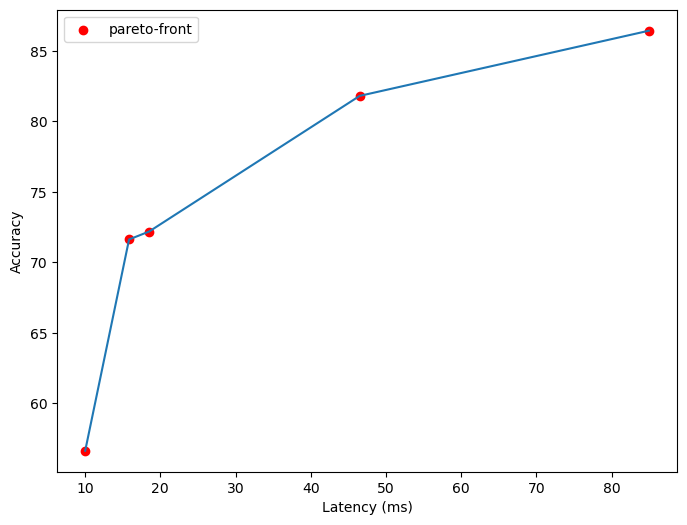

In [5]:
psml_pareto_front = pareto_front_from_model_zoo(psml_m_zoo_)
print(len(psml_pareto_front))

plot_pareto_front(psml_pareto_front)

In [16]:
# queries = [(84.62, 90.18) for _ in range(20)] # vit_large_patch16_224
query = (84.62, 90.18) # vit_large_patch16_224

eps = 1.0
sensitivity = 0.01

In [19]:
exp_pmf = l1_exponential_mechanism(eps, psml_pareto_front, sensitivity, query[0], query[1])
exp_pmf

{'[56.64 10.01]': 0.0005806213142940697,
 '[71.62 15.84]': 0.024565511377879004,
 '[72.18 18.5 ]': 0.02825706409350334,
 '[81.8 46.5]': 0.3130439145391504,
 '[86.42 84.94]': 0.6335528886751732}

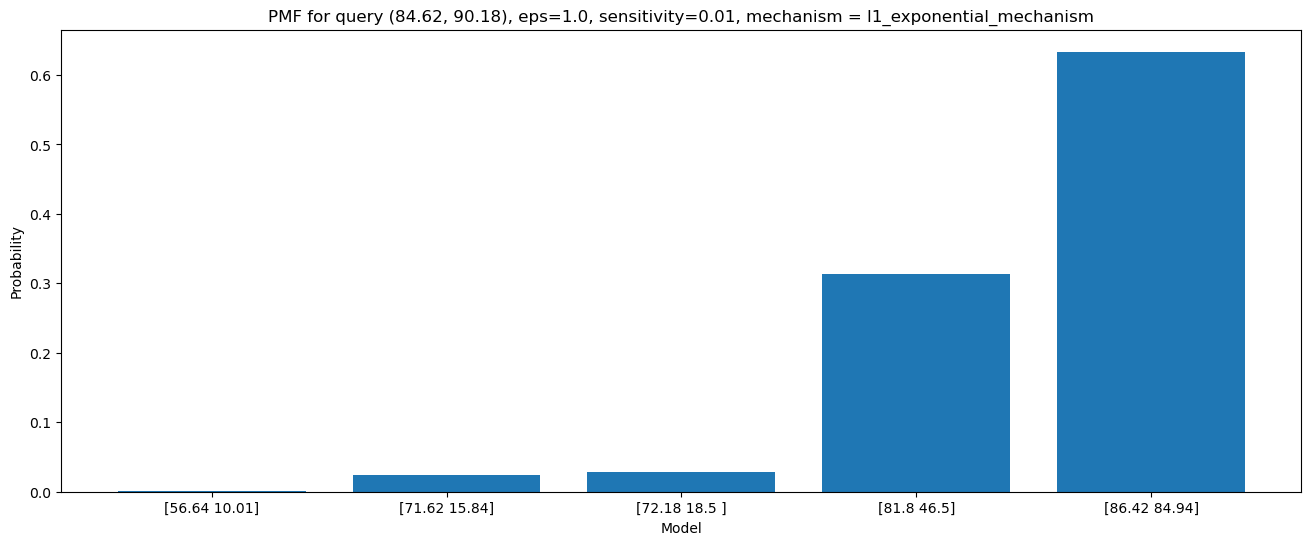

In [20]:
plot_pmf(eps, sensitivity, query, psml_pareto_front, l1_exponential_mechanism)

In [24]:
selected = []
for i in range(10000): 
    selected.append(select_element_from_pmf(exp_pmf))

In [25]:
selected

['[71.62 15.84]',
 '[81.8 46.5]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[72.18 18.5 ]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[81.8 46.5]',
 '[81.8 46.5]',
 '[81.8 46.5]',
 '[72.18 18.5 ]',
 '[81.8 46.5]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[81.8 46.5]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[81.8 46.5]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[81.8 46.5]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[71.62 15.84]',
 '[81.8 46.5]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[86.42 84.94]',
 '[71.62 15.84]',
 '[86.42 84.94]',
 '[81.8 46.5]'

In [31]:
element_counts = Counter(selected)
element_counts

Counter({'[71.62 15.84]': 3,
         '[81.8 46.5]': 38,
         '[86.42 84.94]': 55,
         '[72.18 18.5 ]': 4})

In [30]:
print("=== Numerical PMF ===")
for key, value in exp_pmf.items():
    print(f"{key}: {value:.6f}")

print("\n=== Empirical PMF ===")
for key, value in element_counts.items():
    print(f"{key}: {value:.6f}")

=== Numerical PMF ===
[56.64 10.01]: 0.000581
[71.62 15.84]: 0.024566
[72.18 18.5 ]: 0.028257
[81.8 46.5]: 0.313044
[86.42 84.94]: 0.633553

=== Empirical PMF ===
[71.62 15.84]: 3.000000
[81.8 46.5]: 38.000000
[86.42 84.94]: 55.000000
[72.18 18.5 ]: 4.000000
